### Sequential Learning for Multi-Channel Wireless Network Monitoring With Channel Switching Costs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
from math import pi
import itertools
import random

In [3]:
class AP:
    count = 0
    
    def __init__(self, x, y):
        AP.count += 1
        self.x = x
        self.y = y
        self.channel = 0
        self.radius = 86

    def __str__(self):
        return "AP at (" + str(self.x) + ", " + str(self.y) + ") and channel " + str(self.channel)
        
    def in_hexagon(self, x, y):
        x = abs(x - self.x)
        y = abs(y - self.y)
        s = self.radius
        return y < 3**0.5 * min(s - x, s / 2)


class Sniffer:
    count = 0
    
    def __init__(self, x, y):
        Sniffer.count += 1
        self.x = x
        self.y = y
        self.channel = 0
        self.radius = 120
        self.assigned_user = -1
        
    def __str__(self):
        return "Sniffer at ("+ str(self.x) + ", " + str(self.y) + ") and channel " + str(self.channel)
        
    def in_range(self, x, y):
        x = abs(x - self.x)
        y = abs(y - self.y)
        r = self.radius
        return pow(x,2.0) + pow(y,2.0) <= pow(r,2.0)
    
    def in_range_users(self, users):
        range_users = []
        for user in users:
            if self.in_range(user.x, user.y):
                range_users.append(user) 
#                 print(user)
        return range_users
    
    def assign_channel(self, channel, users):
        self.channel = channel
        inrange_users = self.in_range_users(users)
#         inrange_users = random.shuffle(inrange_users)
        if(inrange_users is not None):
            for i,user in enumerate(inrange_users):
                if user.active:
                    self.assigned_user = i
                    break
        else:
            self.assigned_user = -1
            
        
class User:
    count = 0
    
    def __init__(self, x, y):
        User.count += 1
        self.x = x
        self.y = y
        self.channel = 0  
        self.active = 0
        self.activity_prob = 0.3
        
    def __str__(self):
        return "User at ("+ str(self.x) + ", " + str(self.y) + ") and channel " + str(self.channel) + " and active " + str(self.active)
    
    def in_range_sniffers(self, sniffers):
        range_sniffers = []
        for snif in sniffers:
            if snif.in_range(self.x, self.y):
                range_sniffers.append(snif)
        return range_sniffers
    
    def access_point_in_range(self, aps):
        req = []
        for ap in aps:
            if ap.in_hexagon(self.x, self.y):
                self.channel = ap.channel
                break; 
                
    def change_active(self):
        if np.random.rand() <= self.activity_prob:
            self.active = 1
        else:
            self.active = 0     

In [5]:
sniffers = []
for i in range(0, 550, 100):
    for j in range(0, 550, 100):
        sniffers.append(Sniffer(i,j))

In [6]:
aps = []
for i in range(0, 550, 86*3):
    for j in range(0, 550, 86*2):
        aps.append(AP(i,j))
        
for i in range(86+int(86/2), 550, 86*3):
    for j in range(-86, 550+86, 86*2):
        aps.append(AP(i,j))

In [7]:
users = []
for i in range(0, 300):
        x = np.random.uniform(low=0, high=550, size=(1,))[0]
        y = np.random.uniform(low=0, high=550, size=(1,))[0]
        now = User(x, y)
        now.access_point_in_range(aps)
        now.change_active()
        users.append(now)

In [8]:
print(sniffers[0])

Sniffer at (0, 0) and channel 0


In [9]:
sniffers[0].assign_channel(0, users)

In [10]:
sniffers[0].assigned_user

0

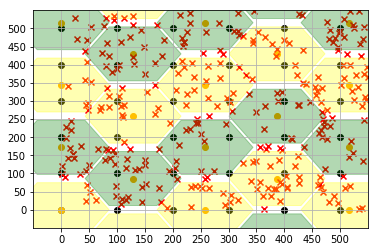

In [11]:
x = [a.x for a in sniffers]
y = [a.y for a in sniffers]

x1 = [a.x for a in aps]
y1 = [a.y for a in aps]

x2 = [a.x for a in users]
y2 = [a.y for a in users]

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 550, 50))
ax.set_yticks(np.arange(0, 550, 50))

for i, a in enumerate(aps):
    if i%2 ==0:
        circle = RegularPolygon((a.x, a.y), 6, radius=a.radius, color="yellow", orientation=pi/2, alpha=0.3)
    else:
        circle = RegularPolygon((a.x, a.y), 6, radius=a.radius, color="green", orientation=pi/2, alpha=0.3)
    ax.add_patch(circle)
    
plt.scatter(x,y, color='black')
plt.scatter(x1,y1, color='orange')    
plt.scatter(x2,y2, marker = "x", color = "red")    

ax.set_xlim(-50, 550)
ax.set_ylim(-50, 550)
plt.grid()
plt.show()

In [12]:
arr = [0,0,0]
channels = 3
sniffer_assign = [0, 2, 1]
phi = []

In [13]:
s_len = len(sniffer_assign)
params = []

In [14]:
def get_iden(arr, channel):
    global sniffer_assign
    arr = np.array(arr)
    sniffer_assign = np.array(sniffer_assign)
    indices = np.where(arr > 0)[0]
    flag = 1
    for index in indices:
        if channel != sniffer_assign[index]:
            output = 0
            flag = 0
            break
    if flag == 1:
        output = 1
    return output

In [15]:
def generate_phi(n):
    now = ["".join(seq) for seq in itertools.product("01", repeat=n)]
#     print(now)
    now.remove("".join([str(0) for i in range(n)]))
    for a in now:
        a =  list(map(int, list(a)))
        for channel in range(0, 3):
            print(a, get_iden(a, channel), channel, sniffer_assign)
        print("")
    
    

In [16]:
generate_phi(3)

[0, 0, 1] 0 0 [0 2 1]
[0, 0, 1] 1 1 [0 2 1]
[0, 0, 1] 0 2 [0 2 1]

[0, 1, 0] 0 0 [0 2 1]
[0, 1, 0] 0 1 [0 2 1]
[0, 1, 0] 1 2 [0 2 1]

[0, 1, 1] 0 0 [0 2 1]
[0, 1, 1] 0 1 [0 2 1]
[0, 1, 1] 0 2 [0 2 1]

[1, 0, 0] 1 0 [0 2 1]
[1, 0, 0] 0 1 [0 2 1]
[1, 0, 0] 0 2 [0 2 1]

[1, 0, 1] 0 0 [0 2 1]
[1, 0, 1] 0 1 [0 2 1]
[1, 0, 1] 0 2 [0 2 1]

[1, 1, 0] 0 0 [0 2 1]
[1, 1, 0] 0 1 [0 2 1]
[1, 1, 0] 0 2 [0 2 1]

[1, 1, 1] 0 0 [0 2 1]
[1, 1, 1] 0 1 [0 2 1]
[1, 1, 1] 0 2 [0 2 1]



In [17]:
class ucb_agent():  
    def __init__(self,k,alpha,sniffers):
        self.arm_count = k
        self.alpha = alpha
#         self.arms_average_rewards = np.random.random(n)
        self.N = np.zeros(((2**sniffers),k))
#         self.arms_rewards = np.zeros((n,))
        self.trials = 0
        self.V = np.zeros((k,))
        self.mean = np.zeros((k,))
        self.theta = np.zeros(((2**sniffers),k))
#         self.last_pick = 0
#         self.optimal = optimal
#         self.regret_hist = []
#         self.regret = 0
        
    def get_action(self):
#         out = np.argmax(arms)
        self.trials += 1
#         x = self.arms_average_rewards+((alpha*np.log(self.trials))/(((self.arm_count.astype(float)+1))))**0.5
        out = np.argmax(self.V)
#         self.last_pick = out
#         self.arms_count[out] += 1
        return out
    def update_theta(self,Y,phi):
        self.theta = self.theta + (Y-self.theta)*phi/self.N
        self.N = self.N + phi
    def update(self,Y,phi):
        scale = (self.alpha*np.log(self.trials))**0.5
        for i in range(self.arm_count):
            self.V[i] = self.mean[i] + (scale)*np.sum(((1/self.N[:,i])**0.5)*phi[:,i])
            self.mean[i] = np.dot(self.theta[:,i],phi[:,i])

        
#         self.arms_rewards[self.last_pick] += r
#         self.arms_average_rewards = self.arms_average_rewards/self.arms_count
        return 
    

In [18]:
agent = ucb_agent()
for action in range(c):
    for i in users:
        i.change_active()
    for j in sniffers:
        j.assign_channel(action,users)

    #     get Y
    #     get phi
    agent.update_theta(Y,phi)
        
        
        
for t in range(steps):
    for i in users:
        i.change_active()
    action = agent.get_action()
    for j in sniffers:
        j.assign_channel(action,users)

    #     get Y
    #     get phi
    if ():
        agent.update_theta(Y,phi)
    
    

SyntaxError: invalid syntax (<ipython-input-18-89a01323376c>, line 2)

In [ ]:
p_u = np.random.rand(user_count)
c_u = np.random.randint(low=1,high=channel,size=user_count)
positions_u = np.random.rand(size=(user_count,2))

y = cvxpy.Parameter(user_count,boolean =True)
z = cvxpy.Parameter((user_count,sniffer_count),boolean=True)


con1 = []
for i in range(user_count):
    for j in range_[i]:
        try:
            x = cvxpy.sum(x,z[j,c[u]])
        except:
            x = z[j,c[u]]
    con1.append(y[i]<=x)
    
con2 = []
for i in range(channel):
    con2.append(cvxpy.sum(z[:,i])<=1)

constraints = con1 + con2
obj = cvxpy.Maximize(cvxpy.sum(cvxpy.multiply(p_u,y)))


problem = cvxpy.Problem(objective=obj,constraints=constraints)
problem.solve()
print (z.values)